In [ ]:
General Feature Extraction
1.File Loading
2.Word Counts
3.Characters Count
4.Average Characters Per Word
5.Stop Words Count
6.Count # Hash Tags,and @Mentions
7.If numeric digits are present in the tweets
8.Upper Case word counts

**File Loading**

In [ ]:
import pandas as pd
import numpy as np
import spacy

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/laxmimerit/twitter-data/master/twitt30k.csv',encoding='latin-1')

In [ ]:
df.head()

,twitts,sentiment
0,@robbiebronniman Sounds like a great night.,1
1,Damn the person who stolde my wallet !!!!! Ma...,1
2,Greetings from the piano bench (photo) http:/...,1
3,@drewryanscott i love it!! i love you!! haha f...,1
4,"@kissthestars Pretty pretty pretty please, pak...",0


In [ ]:
df['sentiment'].value_counts()

1    15000
0    15000
Name: sentiment, dtype: int64

**Word Counts**

In [ ]:
#How many words are in each of the sentences
len('this is text'.split())

3

In [ ]:
df['word_counts']=df['twitts'].apply(lambda x:len(str(x).split()))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts
22993,Is in the class! But he's very sleepy! I'm afr...,1,17
21754,"@Nicxo god, thats bad btw could you go on msn...",0,13
3548,Off for a picnic in the park all i have to do...,1,16
4380,Omg. I hate when I'm trying to go to sleep and...,0,28
1326,@chrismatth Wow! It must have been really inte...,1,23


In [ ]:
df['word_counts'].max()

34

In [ ]:
df['word_counts'].min() #tweet 1 word

1

In [ ]:
df[df['word_counts']==1]

,twitts,sentiment,word_counts
10,must.go.to.bed.early!,0,1
925,Headache,0,1
1035,Toothache,0,1
1189,Toothache!!!,0,1
1205,headache,0,1
...,...,...,...
28588,hangover,0,1
28733,Headacheeeee,0,1
28852,@mr_mustash,0,1
29042,Goodmorning,1,1


**Characters Count**

In [ ]:
df['char_counts']=df['twitts'].apply(lambda x:len(x))
df['char_counts'].head()

0     44
1     92
2     64
3    135
4    131
Name: char_counts, dtype: int64

In [ ]:
len('this is') # if count word count including space

7

In [ ]:
def char_counts(x):
  s=x.split()
  x=''.join(s)
  return len(x)

In [ ]:
char_counts('this is')

6

In [ ]:
df['char_counts']=df['twitts'].apply(lambda x:char_counts(str(x)))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts
27838,Govt's Not Getting The Web: #digitalbritain sigh,0,7,42
1559,I want to go to Jamaica. Kim makes it sound so...,1,18,65
28890,@deighe_d It's worth a try,1,5,22
12817,Getting ready to go see my Grandad ... I hate ...,0,19,77
17897,"@kellysue Sleep well, hopefully your bedroom i...",1,18,80


**Average Word Length**

In [ ]:
x='this is' #6/2=3,totalchar/totalword

In [ ]:
df['avg_word_len']= df['char_counts']/df['word_counts']

In [ ]:
df.sample(4)

,twitts,sentiment,word_counts,char_counts,avg_word_len
4484,"I love my niece, I really do but I want her to...",0,25,81,3.240000
26270,Ha! Wireless from main house reaches all the w...,1,25,111,4.440000
29283,@BonnieWooo hi bonnie! big fan here! it's good...,1,22,93,4.227273
29363,Dailybooth was getting lonely. Talk about a hu...,1,13,85,6.538462


**StopWords Count**

In [ ]:
print(stopwords)

{'beyond', 'being', 'every', 'few', 'fifty', 'how', "'m", 'might', 'something', 'any', 'did', 'hereupon', 'elsewhere', 'against', 'latterly', 'sometimes', 'ever', 'not', 'the', 'call', 'one', 'is', 'such', 'although', 'they', 'us', 'used', 'whom', 'n’t', 'sixty', 'onto', 'ours', 'everything', 'rather', 'who', 'that', "'ve", 'him', 'he', 'part', 'as', 'others', 'put', 'herself', 'anyhow', 'sometime', 'because', 'all', 'its', 'amongst', 'per', 'thence', '‘m', 'nevertheless', 'very', 'where', 'several', 'beside', 'three', 'two', 'may', 'down', 'hence', 'are', 'mostly', 'must', 'indeed', 'should', 'your', '’re', 'also', 'somewhere', 'yourselves', '’ve', 'within', 'which', 'until', 'a', 'seemed', 'do', 'therefore', 'next', 'whatever', 'last', 'or', 'during', 'up', 'now', 'much', '‘s', 'between', 'about', 'cannot', 'himself', 'there', 'upon', 'each', 'anywhere', 'below', 'further', 'latter', 'out', 'eight', 'itself', 'side', 'hers', 'become', 'here', 'my', 'six', 'via', 'therein', 'just', 'b

In [ ]:
len(stopwords)

326

In [ ]:
x='this is the text data'
x.split()

['this', 'is', 'the', 'text', 'data']

In [ ]:
[t for t in x.split() if t in stopwords]

['this', 'is', 'the']

In [ ]:
#Total Number of Stopwords
len([t for t in x.split() if t in stopwords])

3

In [ ]:
df['stop_words_len']=df['twitts'].apply(lambda x:len([t for t in x.split() if t in stopwords]))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len
11601,@officialmgnfox I'm so sorry to hear about you...,0,15,68,4.533333,7
5591,Working on Friends In Need page Adoptables c...,1,9,47,5.222222,1
20836,http://twitpic.com/6bwxg - my international fr...,1,13,90,6.923077,4
3724,haha My mom and sister are going to mexico tom...,0,15,72,4.800000,5
29502,@McFloor http://twitpic.com/7wt4w - wow o.O i ...,0,15,80,5.333333,4


**Count #Hash Tags & @Mentions**

In [ ]:
x='this is #hashtag and this is @mention'

In [ ]:
x.split()

['this', 'is', '#hashtag', 'and', 'this', 'is', '@mention']

In [ ]:
[t for t in x.split() if t.startswith('@')]

['@mention']

In [ ]:
len([t for t in x.split() if t.startswith('@')])

1

In [ ]:
[t for t in x.split() if t.startswith('#')]

['#hashtag']

In [ ]:
df['hashtags_count']=df['twitts'].apply(lambda x:len([t for t in x.split() if t.startswith('#')]))

In [ ]:
df['mentions_count']=df['twitts'].apply(lambda x:len([t for t in x.split() if t.startswith('@')]))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count
3728,watching the NHL Finals game 2 wish the Wild w...,1,17,60,3.529412,7,0,0
16735,"@spiffgoodall Ummm, OK...to each her own, I s'...",1,8,46,5.750000,2,0,1
22891,@Adamcarruthers yeah...,0,2,22,11.000000,0,0,1
4266,@csbseal LOL and look! speak of the devil hims...,1,9,41,4.555556,4,0,1
7829,@vickypazz. Morning Vicky. You're never too ea...,1,9,49,5.444444,3,0,1


**Numeric Digits**

In [ ]:
x='this is 1 and 2'
x.split()

['this', 'is', '1', 'and', '2']

In [ ]:
x.split()[3].isdigit()

False

In [ ]:
x='this is 1 and 2'
len([t for t in x.split() if t.isdigit()])

2

In [ ]:
df['numeric_counts']=df['twitts'].apply(lambda x:len([t for t in x.split() if t.isdigit()]))

In [ ]:
df.sample(4)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_counts
26572,@macmuso England's lovely - it's insanely gree...,1,21,114,5.428571,6,0,1,0
22550,Everyone follow my boys Matt @MATTHARDYBRAND a...,1,15,86,5.733333,2,0,2,0
738,haven't been around much..thanks to Kevin Rudd...,0,21,107,5.095238,8,0,0,0
11518,...i'm bored... waiting for my friend to come....,0,12,66,5.500000,3,0,0,0


**Upper Case Word Count**

In [ ]:
x='I AM HAPPY'
y='i am happy'

In [ ]:
[ t for t in x.split() if t.isupper()]

['I', 'AM', 'HAPPY']

In [ ]:
[ t for t in y.split() if t.isupper()]

[]

In [ ]:
df['upper_counts']=df['twitts'].apply(lambda x:len([t for t in x.split() if t.isupper()]))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_counts,upper_counts
25525,"@maj1210 AH, i wish i could come over. you kno...",1,26,111,4.269231,8,0,1,0,1
328,@bfox11b do your worst,1,4,19,4.750000,2,0,1,0,0
17223,I started reading Sophie's World,1,5,28,5.600000,0,0,0,0,1
15269,http://FunnyOrDie.com/videos/3b203bf255 my bro...,1,13,82,6.307692,7,0,0,0,0
20585,@SedityxBreeze atleast you can add stuff w/o e...,0,16,79,4.937500,7,0,1,0,0


In [ ]:
df.iloc[3962]['twitts']

"I don't want to leave san antonio "

**Lower Case Conversion** 

In [ ]:
x='this is Text'
x.lower()

'this is text'

In [ ]:
x=45.0  # integer format means first convert to string format & then apply lower fun.
str(x).lower()

'45.0'

In [ ]:
df['twitts']=df['twitts'].apply(lambda x:str(x).lower())

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_counts,upper_counts
9967,it does not want to let me in today #creati...,0,10,41,4.100000,5,1,0,0,0
6325,@thechelseastaub no. dylan is my hot guitar te...,1,8,45,5.625000,2,0,1,0,0
4893,@dannysgirlinsfl have a fantastic time girl!!!...,1,18,88,4.888889,9,0,1,0,2
12330,@sobomb omggg why r u twitpickin stillll come ...,0,19,79,4.157895,6,0,1,1,0
25176,i am actually crying now because of sore thr...,0,9,40,4.444444,4,0,0,0,1


**Contraction To Expansion**

In [ ]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [ ]:
def cont_to_exp(x):
  if type(x) is str:
    for key in contractions:
      value=contractions[key]
      x=x.replace(key,value)
    return x
  else:
    return x  

In [ ]:
%timeit
df['twitts']=df['twitts'].apply(lambda x:cont_to_exp(x))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_counts,upper_counts
4380,omg. i hate when i'm trying to go to sleep and...,0,28,103,3.678571,13,0,0,0,1
29494,it has / it is wednesday and my work week has ...,0,9,40,4.444444,4,0,0,0,0
23903,finally done with the kids art project...now e...,0,22,114,5.181818,13,0,0,0,0
6394,@nragins1 ur the best!.... just wish i would h...,0,12,63,5.250000,1,0,1,0,2
453,could do with food. shannon and sean do not se...,0,13,58,4.461538,4,0,0,0,0


**Count & Remove Emails**

In [ ]:
df[df['twitts'].str.contains('.com')]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_counts,upper_counts
1,damn the person who stolde my wallet !!!!! ma...,1,18,73,4.055556,8,0,0,0,0
2,greetings from the piano bench (photo) http:/...,1,7,57,8.142857,2,0,0,0,0
9,"@mileycyrus http://twitpic.com/78urd - miley, ...",1,15,90,6.000000,2,0,1,0,0
11,shhhh...quitely now...come see... i found a ho...,1,11,71,6.454545,3,0,0,0,3
21,singing a duo with an aussie koala www.marcop...,1,9,70,7.777778,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
29930,@angiebeyince http://twitpic.com/6h73m - aww d...,1,8,61,7.625000,0,0,1,0,0
29944,@paulandstorm hey paul! i think today's xkcd w...,1,14,81,5.785714,4,0,1,0,2
29946,@fouldsy 'poor'... so she went fishing? i'm a...,0,21,98,4.666667,7,0,1,0,1
29964,"@all_yaya welcome to the cult, er...i mean, club",1,8,41,5.125000,2,0,1,0,0


In [ ]:
df[df['twitts'].str.contains('gmail.com')]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_counts,upper_counts
7997,@vpaquet could you hook me up with a google vo...,1,18,85,4.722222,6,0,1,0,0
19972,@hot2definc phone was stolen bro.... campbell...,0,6,60,10.000000,1,0,1,0,0


In [ ]:
df.iloc[7997]['twitts']

'@vpaquet could you hook me up with a google voice account? (my twitter id) at gmail.com pretty please? '

In [ ]:
#df[df['twitts'].str.contains('hotmail.com')]

In [ ]:
import re
df['emails']=df['twitts'].apply(lambda x:re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)',x)) #victoria.thompson@emap.com

In [ ]:
df['emails_count']=df['emails'].apply(lambda x:len(x))

In [ ]:
df[df['emails_count']>0]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_counts,upper_counts,emails,emails_count
9757,just seeing all my@ambercamp...about to answer...,0,13,77,5.923077,6,0,0,0,1,[my@ambercamp...about],1
11504,@nursehunter you just need to register. then e...,1,17,95,5.588235,7,0,1,0,0,[victoria.thompson@emap.com],1
14619,@maritorres cool! just send an email to contac...,1,18,112,6.222222,5,1,1,0,1,[contactus@bondno9.com],1
19972,@hot2definc phone was stolen bro.... campbell...,0,6,60,10.000000,1,0,1,0,0,[campbell.relations@gmail.com],1
24514,@joystiq may i have a code please i'v been wan...,0,20,92,4.600000,9,0,1,0,2,[solarboy300@yahoo.com],1
24686,looking to speak to a met life agent. please c...,1,20,102,5.100000,8,0,0,0,0,[lunasin@live.com],1
28377,aw just got the cutest background this little ...,1,18,106,5.888889,6,0,1,0,3,[popstar.team@yahoo.com],1


In [ ]:
df[df['emails_count']>0].sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_counts,upper_counts,emails,emails_count
11504,@nursehunter you just need to register. then e...,1,17,95,5.588235,7,0,1,0,0,[victoria.thompson@emap.com],1
9757,just seeing all my@ambercamp...about to answer...,0,13,77,5.923077,6,0,0,0,1,[my@ambercamp...about],1
14619,@maritorres cool! just send an email to contac...,1,18,112,6.222222,5,1,1,0,1,[contactus@bondno9.com],1
24686,looking to speak to a met life agent. please c...,1,20,102,5.100000,8,0,0,0,0,[lunasin@live.com],1
24514,@joystiq may i have a code please i'v been wan...,0,20,92,4.600000,9,0,1,0,2,[solarboy300@yahoo.com],1


In [ ]:
df.iloc[11504]['twitts']

'@nursehunter you just need to register. then email your blog to victoria.thompson@emap.com - look forward to it '

In [ ]:
df['twitts']=df['twitts'].apply(lambda x:re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"",x))

In [ ]:
df[df['emails_count']>0]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_counts,upper_counts,emails,emails_count
9757,just seeing all to answer them all!! sorry fo...,0,13,77,5.923077,6,0,0,0,1,[my@ambercamp...about],1
11504,@nursehunter you just need to register. then e...,1,17,95,5.588235,7,0,1,0,0,[victoria.thompson@emap.com],1
14619,@maritorres cool! just send an email to (tell...,1,18,112,6.222222,5,1,1,0,1,[contactus@bondno9.com],1
19972,@hot2definc phone was stolen bro....,0,6,60,10.000000,1,0,1,0,0,[campbell.relations@gmail.com],1
24514,@joystiq may i have a code please i'v been wan...,0,20,92,4.600000,9,0,1,0,2,[solarboy300@yahoo.com],1
24686,looking to speak to a met life agent. please c...,1,20,102,5.100000,8,0,0,0,0,[lunasin@live.com],1
28377,aw just got the cutest background this little ...,1,18,106,5.888889,6,0,1,0,3,[popstar.team@yahoo.com],1


In [ ]:
df.iloc[24686]['twitts']

'looking to speak to a met life agent. please call me (804) 858-3902 or email  before wednesday. thank you '

**Count URLs and Remove it** 

In [ ]:
x='hi,thanks for watching it.for more visit https://youtube.com/kgptalkie'

In [ ]:
re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&:/~+#-])?',x)

[('https', 'youtube.com', '/kgptalkie')]

In [ ]:
df['url_flags']=df['twitts'].apply(lambda x: len(re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&:/~+#-])?',x)))

In [ ]:
df[df['url_flags']>0]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_counts,upper_counts,emails,emails_count,url_flags
2,greetings from the piano bench (photo) http:/...,1,7,57,8.142857,2,0,0,0,0,[],0,1
5,really upset http://myloc.me/5x1t,0,3,31,10.333333,0,0,0,0,0,[],0,1
9,"@mileycyrus http://twitpic.com/78urd - miley, ...",1,15,90,6.000000,2,0,1,0,0,[],0,1
11,shhhh...quitely now...come see... i found a ho...,1,11,71,6.454545,3,0,0,0,3,[],0,1
18,my favourite is silver hook which is very nutt...,0,16,80,5.000000,8,0,0,0,0,[],0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29930,@angiebeyince http://twitpic.com/6h73m - aww d...,1,8,61,7.625000,0,0,1,0,0,[],0,1
29944,@paulandstorm hey paul! i think today's xkcd w...,1,14,81,5.785714,4,0,1,0,2,[],0,1
29982,"diana goss posted: oh dear, sorry then if yo...",0,14,71,5.071429,5,0,0,0,0,[],0,1
29986,@fragdolls rofl. not seen that before. my favo...,1,14,82,5.857143,3,0,1,0,1,[],0,1


In [ ]:
df[df['url_flags']>0].sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_counts,upper_counts,emails,emails_count,url_flags
6800,pro tip: the qr code in http://msca.me/jp goes...,1,21,111,5.285714,6,0,0,0,1,[],0,2
347,"@sunkistcami sorry to eavesdrop, but we have t...",1,16,113,7.062500,6,0,1,0,0,[],0,1
20969,my karma should be up http://plurk.com/p/xduea,1,6,41,6.833333,3,0,0,0,0,[],0,1
14755,http://twitpic.com/8dinv going to miss @aliosw...,0,7,56,8.000000,1,0,1,0,0,[],0,1
19646,"@brigettethen http://twitpic.com/6tey4 - yeah,...",0,22,115,5.227273,5,0,1,0,1,[],0,1


In [ ]:
#remove the web address from the tweet data
re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&:/~+#-])?','',x)

'hi,thanks for watching it.for more visit '

In [ ]:
df['twitts']=df['twitts'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&:/~+#-])?','',x))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_counts,upper_counts,emails,emails_count,url_flags
22132,@thomas_edwards not until our first issue of t...,0,22,102,4.636364,11,0,1,0,1,[],0,0
12163,says wee.. tapos na denn magenroll!,1,7,54,7.714286,0,0,0,0,1,[],0,1
23850,@savvyauntie sponsored conversations are bette...,1,18,114,6.333333,6,0,1,0,0,[],0,0
14774,you confuse me,0,3,12,4.000000,2,0,0,0,0,[],0,0
609,@frogst thaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,1,2,54,27.000000,0,0,1,0,0,[],0,0


In [ ]:
df.iloc[609]['twitts']

'@frogst thaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaanks! '

**Remove RT**

In [ ]:
x= 'rt @username:hello hirt'
re.sub(r'\brt\b','',x).strip()

'@username:hello hirt'

In [ ]:
df['twitts']=df['twitts'].apply(lambda x:re.sub(r'\brt\b','',x).strip())

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_counts,upper_counts,emails,emails_count,url_flags
23872,@mcawilliams wow...lomg time no seen ...welcom...,1,8,61,7.625000,1,0,1,0,0,[],0,0
12323,mowing the lawn,0,3,13,4.333333,1,0,0,0,0,[],0,0
7125,gained back 4.5 lbs in 3 days... wtf?!,0,8,31,3.875000,2,0,0,1,1,[],0,0
17746,more than half way throught the last twighligh...,0,15,68,4.533333,5,0,0,0,1,[],0,0
18041,"if i were in college, i would be done or just ...",0,27,94,3.481481,16,0,0,0,3,[],0,0


**Special Chars removal or punctuation removal**

In [ ]:
df.sample(3)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_counts,upper_counts,emails,emails_count,url_flags
17165,@thankasoldier - wow. that really pulls at th...,0,11,76,6.909091,3,0,1,0,0,[],0,1
26473,feild day today,1,3,13,4.333333,0,0,0,0,0,[],0,0
29892,muchos champagne drinking going on in the rive...,0,21,90,4.285714,9,0,0,0,0,[],0,0


In [ ]:
x='@thankasoldier - wow. that really pulls at th...'

In [ ]:
re.sub(r'[^\w ]+',"",x)

'thankasoldier  wow that really pulls at th'

In [ ]:
df['twitts']=df['twitts'].apply(lambda x: re.sub(r'[^\w ]+',"",x))

In [ ]:
df.sample(2)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_counts,upper_counts,emails,emails_count,url_flags
12062,what it tells you is how often you are being l...,1,26,95,3.653846,17,0,0,0,5,[],0,0
18611,grumpy_cow hey my fav is riesling too especial...,0,17,82,4.823529,2,0,1,0,1,[],0,0


In [ ]:
df.iloc[12062]['twitts']

'what it tells you is how often you are being looked at by others and it goes by your id  i was shocked yet very happy'

**Remove Multiple Spaces**

In [ ]:
x='hi     hello     how are you'

In [ ]:
' '.join(x.split())

'hi hello how are you'

In [ ]:
df['twitts']=df['twitts'].apply(lambda x: ' '.join(x.split()))

**Remove HTML tags**

In [ ]:
!pip install beautifulsoup4

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
x='<html><h1> thanks for watching it  </h1></html>'

In [ ]:
x.replace('<html><h1>', '').replace('</h1></html>','') #sample not good

' thanks for watching it  '

In [ ]:
BeautifulSoup(x,'lxml').get_text().strip()

'thanks for watching it'

In [ ]:
%%time
df['twitts']=df['twitts'].apply(lambda x: BeautifulSoup(x,'lxml').get_text().strip())

CPU times: user 5.07 s, sys: 282 ms, total: 5.35 s
Wall time: 5.36 s


**Remove Accented Chars**

In [ ]:
import unicodedata

In [ ]:
x= "ŠŽšžŸÀÁÂÃÄÅÇÈÉÊËÌÍÎÏÐÑÒÓÔÕÖÙÚÛÜÝàáâãäåçèéêëìíîïðñòóôõöùúûüýÿ"

In [ ]:
def remove_accented_chars(x):
  x=unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('utf-8','ignore')
  return x

In [ ]:
remove_accented_chars(x)

'SZszYAAAAAACEEEEIIIINOOOOOUUUUYaaaaaaceeeeiiiinooooouuuuyy'

In [ ]:
df['twitts']=df['twitts'].apply(lambda x: remove_accented_chars(x))

**Remove Stop Words** 

In [ ]:
x='this is a stop words'

In [ ]:
' '.join([t for t in x.split() if t not in stopwords])

'stop words'

In [ ]:
df['twitts_no_stop']=df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in stopwords]) )

In [ ]:
df.sample(2)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_counts,upper_counts,emails,emails_count,url_flags,twitts_no_stop
2523,thought i was getting halfdecent at frothing t...,0,18,101,5.611111,7,1,0,0,1,[],0,0,thought getting halfdecent frothing milk morni...
6515,just awoke from a terrible dream,0,6,27,4.500000,2,0,0,0,0,[],0,0,awoke terrible dream


**Convert into base or root form of word**

In [ ]:
nlp=spacy.load('en_core_web_sm')

In [ ]:
x='this is chocolates balls times'

In [ ]:
def make_to_base(x):
  x=str(x)
  x_list=[]
  doc=nlp(x)

  for token in doc:
    lemma=token.lemma_
    if lemma == '-PRON-' or lemma == 'be':
      lemma=token.text

    x_list.append(lemma)
  return ' '.join(x_list)

In [ ]:
make_to_base(x)

'this is chocolate ball time'

In [ ]:
df['twitts']=df['twitts'].apply(lambda x:make_to_base(x) )

In [ ]:
df.sample(2)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_counts,upper_counts,emails,emails_count,url_flags,twitts_no_stop
10539,shoufii noo they dunt,0,5,21,4.2,1,0,1,0,0,[],0,0,shoufii noo dunt
10914,farbrorf that have that is great can not wait ...,1,10,49,4.9,4,0,1,0,0,[],0,0,farbrorfest great wait action


**Common words removal**

In [ ]:
x='this is this okay bye'

In [ ]:
text=' '.join(df['twitts'])

In [ ]:
len(text)

2045776

In [ ]:
text=text.split()

In [ ]:
len(text) #total number of words

406959

In [ ]:
freq_comm=pd.Series(text).value_counts()
freq_comm

i           18065
to          10895
the          9605
have         7716
a            7152
            ...  
meyerweb        1
quotlost        1
thohave         1
parator         1
wilt            1
Length: 40320, dtype: int64

In [ ]:
#Get first 20 words
f20=freq_comm[:20]
f20

i       18065
to      10895
the      9605
have     7716
a        7152
it       6929
is       6893
not      6689
my       5903
you      5817
and      5529
do       4627
in       4096
for      4095
that     3720
of       3485
go       3464
m        3374
get      3287
on       3129
dtype: int64

In [ ]:
df['twitts']=df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in f20]))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_counts,upper_counts,emails,emails_count,url_flags,twitts_no_stop
13653,doktoravalanche are welcome,1,3,30,10.000000,0,0,1,0,0,[],0,0,doktoravalanche welcome
21398,ivybean104 hey just start follow,1,7,40,5.714286,2,0,1,0,0,[],0,0,ivybean104 hey ive started following
14709,work away,1,3,13,4.333333,1,0,0,0,0,[],0,0,working away
27685,just become fan rabat facebook dunno why this ...,1,26,107,4.115385,15,0,0,0,0,[],0,0,fan rabat facebook dunno amuses prob cuz miss ...
20943,sh0p sh0p time sinical,1,4,21,5.250000,0,0,0,0,0,[],0,0,sh0p sh0p time sinical


**Rare words removal**

In [ ]:
rare20=freq_comm.tail(20)

In [ ]:
df['twitts']=df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare20]))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_counts,upper_counts,emails,emails_count,url_flags,twitts_no_stop
13848,kudanmarco yup just happen today without any w...,0,10,64,6.400000,3,0,1,0,0,[],0,0,kudanmarco yup happen today warning announcement
23534,marinaanicolee marina love miss gurl,0,8,42,5.250000,2,0,1,0,2,[],0,0,marinaanicolee marina love miss gurl
23913,peterfacinelli know just fair everybody see 40...,0,14,74,5.285714,5,0,1,1,0,[],0,0,peterfacinelli know fair everybody saw 400 fol...
23612,oh noooooooooooo demi lovato trace cyru are to...,0,17,89,5.235294,3,0,0,0,0,[],0,0,oh noooooooooooo demi lovato trace cyrus total...
7833,samjmoody hey sam how how how your day been so...,1,9,40,4.444444,3,0,1,0,0,[],0,0,samjmoody hey sam day far


**Word Cloud Visualization**

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
text=' '.join(df['twitts'])

In [ ]:
len(text)

1642893

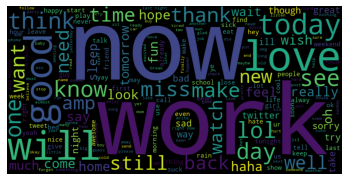

In [ ]:
wc=WordCloud(width=800,height=400).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

**Spelling Correction**

In [ ]:
!pip install -U textblob

Requirement already up-to-date: textblob in /usr/local/lib/python3.6/dist-packages (0.15.3)


In [ ]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
from textblob import TextBlob

In [ ]:
x='thankkks for waching it'

In [ ]:
x=TextBlob(x).correct()

**Tokenization using TextBlob**

In [ ]:
x='thanks#watching this video. please like it'

In [ ]:
TextBlob(x).words

WordList(['thanks', 'watching', 'this', 'video', 'please', 'like', 'it'])

In [ ]:
doc=nlp(x)
for token in doc:
  print(token)

thanks#watching
this
video
.
please
like
it


**Detecting Nouns**

In [ ]:
x='Breaking News:Donal Trump, the president of the USA is looking to sign a deal to mine the moon'

In [ ]:
doc=nlp(x)

In [ ]:
for noun in doc.noun_chunks:
  print(noun)

Breaking News
Donal Trump
the president
the USA
a deal
the moon


**Language Translation and Detection**

In [ ]:
x

'Breaking News:Donal Trump, the president of the USA is looking to sign a deal to mine the moon'

In [ ]:
tb=TextBlob(x)

In [ ]:
tb.detect_language()

'en'

In [ ]:
tb.translate(to='fr')

TextBlob("Dernières nouvelles: Donal Trump, le président des États-Unis cherche à signer un accord pour miner la lune")

In [ ]:
tb.translate(to='hi')

TextBlob("ब्रेकिंग न्यूज: डोनाल्ड ट्रम्प, संयुक्त राज्य अमेरिका के राष्ट्रपति चांद को खदान करने के लिए एक समझौते पर हस्ताक्षर करना चाहते हैं")

In [ ]:
tb.translate(to='ar')

TextBlob("خبر عاجل: دونال ترامب ، رئيس الولايات المتحدة يتطلع إلى توقيع صفقة لتعدين القمر")

In [ ]:
tb.translate(to='or')

TextBlob("ବ୍ରେକିଂ ନ୍ୟୁଜ୍: ଆମେରିକାର ରାଷ୍ଟ୍ରପତି ଡୋନାଲ୍ ଟ୍ରମ୍ପ ଚନ୍ଦ୍ରକୁ ଖଣି କରିବା ପାଇଁ ଏକ ଚୁକ୍ତିନାମା କରିବାକୁ ଚାହୁଁଛନ୍ତି")

In [ ]:
tb.translate(to='bn')

TextBlob("ব্রেকিং নিউজ: যুক্তরাষ্ট্রের রাষ্ট্রপতি ডোনাল ট্রাম্প চাঁদ খনির জন্য একটি চুক্তিতে সই করতে চাইছেন")

In [ ]:
tb.translate(to='zh')

TextBlob("最新消息：美国总统唐纳德·特朗普（Don Trump）希望签署一项开采月球的协议")

**Use TextBlob's Inbuilt Sentiment Classifier**

In [ ]:
from textblob.sentiments import NaiveBayesAnalyzer
x='we all stands together .we are gonna win this fight'

In [ ]:
tb=TextBlob(x,analyzer=NaiveBayesAnalyzer())

In [ ]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.9180581552428241, p_neg=0.0819418447571765)

**How can I preprocess NLP text (lowercase, remove special characters, remove numbers, remove emails, etc) in one pass using Python?**

In [ ]:
Here are all the things I want to do to a Pandas dataframe in one pass in python:
1. Lowercase text
2. Remove whitespace
3. Remove numbers
4. Remove special characters
5. Remove emails
6. Remove stop words
7. Remove NAN
8. Remove weblinks
9. Expand contractions (if possible not necessary)
10. Tokenize

In [ ]:
def preprocess(self, dataframe):


    self.log.info("In preprocess function.")

    dataframe1 = self.remove_nan(dataframe)
    dataframe2 = self.lowercase(dataframe1)
    dataframe3 = self.remove_whitespace(dataframe2)

    # Remove emails and websites before removing special characters
    dataframe4 = self.remove_emails(self, dataframe3)
    dataframe5 = self.remove_website_links(self, dataframe4)

    dataframe6 = self.remove_special_characters(dataframe5)
    dataframe7 - self.remove_numbers(dataframe6)
    self.remove_stop_words(dataframe8) # Doesn't return anything for now
    dataframe7 = self.tokenize(dataframe6)

    self.log.info(f"Sample of preprocessed data: {dataframe4.head()}")

    return dataframe7

def remove_nan(self, dataframe):
    """Pass in a dataframe to remove NAN from those columns."""
    return dataframe.dropna()

def lowercase(self, dataframe):
    logging.info("Converting dataframe to lowercase")
    lowercase_dataframe = dataframe.apply(lambda x: x.lower())
    return lowercase_dataframe


def remove_special_characters(self, dataframe):
    self.log.info("Removing special characters from dataframe")
    no_special_characters = dataframe.replace(r'[^A-Za-z0-9 ]+', '', regex=True)
    return no_special_characters

def remove_numbers(self, dataframe):
    self.log.info("Removing numbers from dataframe")
    removed_numbers = dataframe.str.replace(r'\d+','')
    return removed_numbers

def remove_whitespace(self, dataframe):
    self.log.info("Removing whitespace from dataframe")
    # replace more than 1 space with 1 space
    merged_spaces = dataframe.str.replace(r"\s\s+",' ')
    # delete beginning and trailing spaces
    trimmed_spaces = merged_spaces.apply(lambda x: x.str.strip())
    return trimmed_spaces

def remove_stop_words(self, dataframe):
    # TODO: An option to pass in a custom list of stopwords would be cool.
    set(stopwords.words('english'))

def remove_website_links(self, dataframe):
    self.log.info("Removing website links from dataframe")
    no_website_links = dataframe.str.replace(r"http\S+", "")
    return no_website_links

def tokenize(self, dataframe):
    tokenized_dataframe = dataframe.apply(lambda row: word_tokenize(row))
    return tokenized_dataframe

def remove_emails(self, dataframe):
    no_emails = dataframe.str.replace(r"\S*@\S*\s?")
    return no_emails

def expand_contractions(self, dataframe):
    # TODO: Not a priority right now. Come back to it later.
    return dataframe

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

 def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


df['cleanText']=df['Text'].map(lambda s:preprocess(s)) 